# AI - Project 01- Mohsen Fayyaz - 810196650

<ul>
    <li><b>Modeling:</b><br>
        <ul>
            <li>
                <b>Initial State:</b> map read from the file
            </li>
            <li>
                <b>Goal State:</b> a map which doesn't contain any numbers in it i.e. 1,2 or 3.
            </li>
            <li>
                <b>actions:</b> There are 8 different possible actions in any state which are moving P or Q one block to one of the four cardinal directions. (The move might not be possible due to colliding with walls or etc.)
            </li>
        </ul>
    </li>
</ul>

In [2]:
from queue import Queue
from time import sleep, time
import copy
from os import system, name
import sys
from IPython.display import clear_output

P_CHAR = "P"
Q_CHAR = "Q"
WALL_CHAR = "%"
EMPTY_CHAR = " "
P_FOOD = "1"
Q_FOOD = "2"
BOTH_FOOD = "3"


class Pac_map_handler:
    @staticmethod
    def find_in_map(the_map, char):
        for line in the_map:
            if char in line:
                return the_map.index(line), line.index(char)

    @staticmethod
    def is_in_map(pac_map: list, row, col):
        return 0 <= row < len(pac_map) and 0 <= col < len(pac_map[0])

    @staticmethod
    def can_p_goto(pac_map: list, row, col):
        return Pac_map_handler.is_in_map(pac_map, row, col) and pac_map[row][col] in {P_FOOD, EMPTY_CHAR, BOTH_FOOD}

    @staticmethod
    def can_q_goto(pac_map: list, row, col):
        return Pac_map_handler.is_in_map(pac_map, row, col) and pac_map[row][col] in {Q_FOOD, EMPTY_CHAR, BOTH_FOOD}

    # P MOVEMENT
    @staticmethod
    def move_p_right(pac_map, row, col):
        if Pac_map_handler.can_p_goto(pac_map, row, col + 1):
            pac_map[row][col] = EMPTY_CHAR
            pac_map[row][col + 1] = P_CHAR
        return pac_map

    @staticmethod
    def move_p_left(pac_map, row, col):
        if Pac_map_handler.can_p_goto(pac_map, row, col - 1):
            pac_map[row][col] = EMPTY_CHAR
            pac_map[row][col - 1] = P_CHAR
        return pac_map

    @staticmethod
    def move_p_up(pac_map, row, col):
        if Pac_map_handler.can_p_goto(pac_map, row - 1, col):
            pac_map[row][col] = EMPTY_CHAR
            pac_map[row - 1][col] = P_CHAR
        return pac_map

    @staticmethod
    def move_p_down(pac_map, row, col):
        if Pac_map_handler.can_p_goto(pac_map, row + 1, col):
            pac_map[row][col] = EMPTY_CHAR
            pac_map[row + 1][col] = P_CHAR
        return pac_map

    # Q MOVEMENT
    @staticmethod
    def move_q_right(pac_map, row, col):
        if Pac_map_handler.can_q_goto(pac_map, row, col + 1):
            pac_map[row][col] = EMPTY_CHAR
            pac_map[row][col + 1] = Q_CHAR
        return pac_map

    @staticmethod
    def move_q_left(pac_map, row, col):
        if Pac_map_handler.can_q_goto(pac_map, row, col - 1):
            pac_map[row][col] = EMPTY_CHAR
            pac_map[row][col - 1] = Q_CHAR
        return pac_map

    @staticmethod
    def move_q_up(pac_map, row, col):
        if Pac_map_handler.can_q_goto(pac_map, row - 1, col):
            pac_map[row][col] = EMPTY_CHAR
            pac_map[row - 1][col] = Q_CHAR
        return pac_map

    @staticmethod
    def move_q_down(pac_map, row, col):
        if Pac_map_handler.can_q_goto(pac_map, row + 1, col):
            pac_map[row][col] = EMPTY_CHAR
            pac_map[row + 1][col] = Q_CHAR
        return pac_map

    @staticmethod
    def print_map(pac_map):
        cls()
        print('\n'.join(''.join(item) for item in pac_map))

    @staticmethod
    def nearest_distance(pac_map, start_char, final_char):
        row, col = Pac_map_handler.find_in_map(pac_map, start_char)
        return Pac_map_handler.nearest_char_distance(pac_map, row, col, final_char)

    @staticmethod
    def nearest_char_distance(pac_map, row, col, char):
        char_list = list()
        for line in pac_map:
            if char in line:
                char_list.append([pac_map.index(line), line.index(char)])

        if len(char_list) > 0:
            min_distance = Pac_map_handler.distance(row, col, char_list[0][0], char_list[0][1])
        else:
            return 0
        for found_char in char_list:
            distance = Pac_map_handler.distance(row, col, found_char[0], found_char[1])
            if distance < min_distance:
                min_distance = distance

        return min_distance

    @staticmethod
    def distance(row_1, col_1, row_2, col_2):
        return abs(row_1-row_2) + abs(col_1 - col_2)

def cls():
    # for windows
    if name == 'nt':
        _ = system('cls')

        # for mac and linux(here, os.name is 'posix')
    else:
        _ = system('clear')

    clear_output(wait=True)

In [3]:
class State:
    def __init__(self, map_data, parent=None, depth=0):
        self.map_data = map_data
        self.parent = parent
        self.hash = ''.join(''.join(item) for item in map_data).replace("%", "")
        if parent is None:
            self.depth = 0
        else:
            self.depth = parent.depth + 1

    def get_hash(self):
        return self.hash

    def get_map(self):
        return self.map_data

    def get_parent(self):
        return self.parent


# BFS)
<ul>
    <li>
        <b>Algorithm:</b> Breadth-first search is an algorithm for traversing or searching tree or graph data structures. It starts at the tree root, and explores all of the neighbor nodes at the present depth prior to moving on to the nodes at the next depth level.
        <br>
        For any new state we make, we add another node to frontier and also the node's hash into explored set. That's because in BFS we can be sure that if we see a new state which was added into the frontier or explored set before, it doesn't have to be added to the frontier again.(This assumption is not true for A* algorithm)
    </li>

</ul>


## BFS implementation:

In [4]:
class BFS:
    def __init__(self, pac_map):
        self.start_state = State(pac_map, None)
        self.explored_states_hash = set()
        self.unique_states_hash = set()
        self.num_of_explored_states = 0
        self.num_of_unique_explored_states = 0
        self.frontier_states = Queue()
        self.goal_state = None
        self.goal_state_is_found = False

    def start(self):
        self.goal_state_is_found = False
        self.frontier_states = Queue()
        self.frontier_states.put(self.start_state)
        self.explored_states_hash = set()
        self.explored_states_hash.add(self.start_state.get_hash())
        self.unique_states_hash = set()
        self.num_of_explored_states = 0
        self.num_of_unique_explored_states = 0
        while not self.frontier_states.empty():
            current_state = self.frontier_states.get()
            self.num_of_explored_states += 1
            if current_state.get_hash() not in self.unique_states_hash:
                self.unique_states_hash.add(current_state.get_hash())
                self.num_of_unique_explored_states += 1

            # self.print_map(current_state.get_map())
            if self.are_constraints_satisfied(current_state):
                self.goal_state = current_state
                self.goal_state_is_found = True
                return True

            self.do_actions(current_state)
            if self.goal_state_is_found:
                return True

        return False

    def print_solution(self, delay=0.2):
        if self.goal_state is None:
            print("No Solution!")
        else:
            current_state = self.goal_state
            states_list = list()
            while current_state is not None:
                states_list.append(current_state)
                current_state = current_state.get_parent()

            for state in reversed(states_list):
                Pac_map_handler.print_map(state.get_map())
                sleep(delay)

            print("Explored States: " + str(self.num_of_explored_states))
            print("Explored Unique States: " + str(self.num_of_unique_explored_states))
            print("Goal Depth: " + str(len(states_list)))

    def are_constraints_satisfied(self, state: State):
        for line in state.get_map():
            if P_FOOD in line or Q_FOOD in line or BOTH_FOOD in line:
                return False
        return True

    def do_actions(self, current_state):
        pac_map = current_state.get_map()
        p_row, p_col = Pac_map_handler.find_in_map(pac_map, P_CHAR)
        q_row, q_col = Pac_map_handler.find_in_map(pac_map, Q_CHAR)
        # P MOVEMENT
        self.move_p(current_state, pac_map, p_row, p_col)
        # Q MOVEMENT
        self.move_q(current_state, pac_map, q_row, q_col)

    def move_p(self, current_state, pac_map, row, col):
        new_map = Pac_map_handler.move_p_up(copy.deepcopy(pac_map), row, col)
        self.add_to_frontier(new_map, current_state)

        new_map = Pac_map_handler.move_p_left(copy.deepcopy(pac_map), row, col)
        self.add_to_frontier(new_map, current_state)

        new_map = Pac_map_handler.move_p_down(copy.deepcopy(pac_map), row, col)
        self.add_to_frontier(new_map, current_state)

        new_map = Pac_map_handler.move_p_right(copy.deepcopy(pac_map), row, col)
        self.add_to_frontier(new_map, current_state)

    def move_q(self, current_state, pac_map, row, col):
        new_map = Pac_map_handler.move_q_up(copy.deepcopy(pac_map), row, col)
        self.add_to_frontier(new_map, current_state)

        new_map = Pac_map_handler.move_q_left(copy.deepcopy(pac_map), row, col)
        self.add_to_frontier(new_map, current_state)

        new_map = Pac_map_handler.move_q_down(copy.deepcopy(pac_map), row, col)
        self.add_to_frontier(new_map, current_state)

        new_map = Pac_map_handler.move_q_right(copy.deepcopy(pac_map), row, col)
        self.add_to_frontier(new_map, current_state)

    def add_to_frontier(self, new_map, current_state):
        new_state = State(new_map, current_state)
        if not new_state.get_hash() in self.explored_states_hash:
            self.frontier_states.put(new_state)
            self.explored_states_hash.add(new_state.get_hash())
            if self.are_constraints_satisfied(new_state):
                self.goal_state = new_state
                self.goal_state_is_found = True


In [8]:
def main():
    with open('test3', 'r') as file:
        pac_map = file.read().splitlines()

    characterized_map = list()
    for line in pac_map:
        characterized_map.append(list(line))

    print("Loading...")
    start = time()

    my_bfs = BFS(characterized_map)
    my_bfs.start()
    end = time()
    my_bfs.print_solution(delay=0.1)

    
    print("Time: " + str(end - start) + "s")


main()


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%            Q   %      %%%% %   %%  %%% %      %
% %%%%% %% %%%     %  %     P          %  %%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Explored States: 2372
Explored Unique States: 2372
Goal Depth: 21
Time: 1.826143741607666s


# IDS)
Iterative Deepening Search

<ul>
    <li>
        <b>Algorithm:</b> In computer science, iterative deepening search or more specifically iterative deepening depth-first search is a state space/graph search strategy in which a depth-limited version of depth-first search is run repeatedly with increasing depth limits until the goal is found.
        <br>
        For optimizing the time and number of states explored in this method, I save a number beside the explored state, which is the best depth that one branch of DFS could get into that state with.
        <br>
        This way, branches of DFS won't expand in states that have been expanded before with shorter or equal path lengths to that point.
        <br>
        This method advantage is it's memory. It can be changed in the code where it is mentioned, but smaller memory will slow down the IDS algorithm in a way that we would need minutes to finish each one of the tests.
        <br>
        There are three different memory sizes we can have in my code.
        <br>
        <ol>
            <li>
                The first one which is the best in memory has been explained above.
            </li>
            <li>
                The second one is to just use the memory, proportional to all the states in one level of IDS, which will stop branches in a DFS in a specific max level from going to an explored state unless they have fewer steps to that state.
            </li>
            <li>
                The third one is using a stack which size would be at most the length of the longest branch.
        This approch will minimize used memory but it will have very long execution time which can't be even reported.
            </li>
        </ol>
    </li>
</ul>



## IDS implementation:

In [9]:
class IDS:
    def __init__(self, pac_map):
        self.start_state = State(pac_map, None)

        self.all_explored_states_hash = set()
        self.all_explored_states_hash_best_depth = dict()

        self.one_DFS_explored_states_hash = set()
        self.one_DFS_explored_states_hash_best_depth = dict()

        self.unique_states_hash = set()
        self.num_of_explored_states = 0
        self.num_of_unique_explored_states = 0
        self.goal_state = None
        self.goal_state_is_found = False

        self.hash_maps_to_food_number = dict()

    def init_attributes(self):
        self.goal_state_is_found = False
        self.one_DFS_explored_states_hash = set()
        self.one_DFS_explored_states_hash_best_depth = dict()
        # self.unique_states_hash = set()
        # self.num_of_explored_states = 0
        # self.num_of_unique_explored_states = 0

    def count_explored_state(self, state):
        self.num_of_explored_states += 1;
        if state.get_hash() not in self.unique_states_hash:
            self.unique_states_hash.add(state.get_hash())
            self.num_of_unique_explored_states += 1

    def DFS(self, state, max_depth, current_depth=0, explored=list()):
        self.count_explored_state(state)

        if current_depth >= max_depth:
            return False

        if self.are_constraints_satisfied(state):
            self.goal_state_is_found = True
            self.goal_state = state
            return True

        if state.get_hash() in explored:
            return False

        # < COMMENT FOR MEMORY OF the neighbors of a single path through the search tree

        # CAN'T GO TO AN EXPLORED STATE IN THIS DFS LEVEL UNLESS WITH SMALLER DEPTH
        if state.get_hash() in self.one_DFS_explored_states_hash and \
                current_depth >= self.one_DFS_explored_states_hash_best_depth[state.get_hash()]:
            return False

        # CAN'T GO TO AN EXPLORED STATE IN ALL DFS LEVELS UNLESS WITH SMALLER OR EQUAL DEPTH
        if state.get_hash() in self.all_explored_states_hash and \
                current_depth > self.all_explored_states_hash_best_depth[state.get_hash()]:
            return False

        self.all_explored_states_hash.add(state.get_hash())
        self.all_explored_states_hash_best_depth[state.get_hash()] = current_depth
        self.one_DFS_explored_states_hash.add(state.get_hash())
        self.one_DFS_explored_states_hash_best_depth[state.get_hash()] = current_depth

        # COMMENT FOR MEMORY OF the neighbors of a single path through the search tree />

        explored.append(state.get_hash())

        pac_map = state.get_map()
        p_row, p_col = Pac_map_handler.find_in_map(pac_map, P_CHAR)
        q_row, q_col = Pac_map_handler.find_in_map(pac_map, Q_CHAR)

        # P -------
        new_map = Pac_map_handler.move_p_left(copy.deepcopy(pac_map), p_row, p_col)
        new_state = State(new_map, state)
        if self.DFS(new_state, max_depth, current_depth + 1):
            return True

        new_map = Pac_map_handler.move_p_down(copy.deepcopy(pac_map), p_row, p_col)
        new_state = State(new_map, state)
        if self.DFS(new_state, max_depth, current_depth + 1):
            return True

        new_map = Pac_map_handler.move_p_up(copy.deepcopy(pac_map), p_row, p_col)
        new_state = State(new_map, state)
        if self.DFS(new_state, max_depth, current_depth + 1):
            return True

        new_map = Pac_map_handler.move_p_right(copy.deepcopy(pac_map), p_row, p_col)
        new_state = State(new_map, state)
        if self.DFS(new_state, max_depth, current_depth + 1):
            return True

        # Q -------------
        new_map = Pac_map_handler.move_q_left(copy.deepcopy(pac_map), q_row, q_col)
        new_state = State(new_map, state)
        if self.DFS(new_state, max_depth, current_depth + 1):
            return True

        new_map = Pac_map_handler.move_q_right(copy.deepcopy(pac_map), q_row, q_col)
        new_state = State(new_map, state)
        if self.DFS(new_state, max_depth, current_depth + 1):
            return True

        new_map = Pac_map_handler.move_q_up(copy.deepcopy(pac_map), q_row, q_col)
        new_state = State(new_map, state)
        if self.DFS(new_state, max_depth, current_depth + 1):
            return True

        new_map = Pac_map_handler.move_q_down(copy.deepcopy(pac_map), q_row, q_col)
        new_state = State(new_map, state)
        if self.DFS(new_state, max_depth, current_depth + 1):
            return True

        explored.pop()
        return False

    def start(self):
        ids_max_depth = 0
        self.all_explored_states_hash = set()
        self.all_explored_states_hash_best_depth = dict()
        self.unique_states_hash = set()
        self.num_of_explored_states = 0
        self.num_of_unique_explored_states = 0
        print("Current IDS Depth:", end=" ");
        while True:
            ids_max_depth += 1
            print(ids_max_depth, end=" -> ")
            self.init_attributes()

            self.DFS(self.start_state, ids_max_depth)
            if self.goal_state_is_found:
                return True

        return False

    def print_solution(self, delay=0.2):
        if self.goal_state is None:
            print("No Solution!")
        else:
            current_state = self.goal_state
            states_list = list()
            while current_state is not None:
                states_list.append(current_state)
                current_state = current_state.get_parent()

            for state in reversed(states_list):
                Pac_map_handler.print_map(state.get_map())
                sleep(delay)

            print("Explored States: " + str(self.num_of_explored_states))
            print("Explored Unique States: " + str(self.num_of_unique_explored_states))
            print("Goal Depth: " + str(len(states_list)))

    def are_constraints_satisfied(self, state: State):
        for line in state.get_hash():
            if P_FOOD in line or Q_FOOD in line or BOTH_FOOD in line:
                return False
        return True


In [11]:
def main():
    with open('test3', 'r') as file:
        pac_map = file.read().splitlines()

    characterized_map = list()
    for line in pac_map:
        characterized_map.append(list(line))

    print("Loading...")
    start = time()

    # my_bfs = BFS(characterized_map)
    # my_bfs.start()
    # my_bfs.print_solution(delay=0.2)

    my_ids = IDS(characterized_map)
    my_ids.start()
    end = time()
    my_ids.print_solution(delay=0.2)

    
    print("Time: " + str(end - start) + "s")


main()

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%            Q   %      %%%% %   %%  %%% %      %
% %%%%% %% %%%     %  %     P          %  %%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Explored States: 133310
Explored Unique States: 3017
Goal Depth: 21
Time: 13.037333965301514s


# A* search algorithm)

<ul>
    <li>
        <b>Algorithm:</b> In computer science, A* is a computer algorithm that is widely used in pathfinding and graph traversal, which is the process of finding a path between multiple points, called "nodes". It enjoys widespread use due to its performance and accuracy.
    </li>
    <br>
    <li>
        <b>Heuristic:</b>
        $$ f(n) = g(n) + h(n) $$ <br>
        $$
            h(n) = \left\{\begin{array}{lr}
            \text{P_nearest_1_distance + Q_nearest_2_distance}, & \text{for when there is at least one of 1 or 2} \\
            \text{min(P_nearest_3_distance, Q_nearest_3_distance)}, & \text{for when there is no 1 or 2} \\
            \end{array}\right\}
        $$<br>
        When still there is 1 or 2 in the map, the heuristic is p_nearest_1_distance + q_nearest_2_distance
        <br>
        But when there is no 1 or 2, both want to eat 3, so the heurisitc will be min(p_nearest_3_distance, q_nearest_3_distance)
        <br>
        All the distances are Manhattan distance
        <br>
        <ul>
            <li>Admissibility:<br>
                Proof: In the first condition the P has to eat all 1s and Q has to eat all 2s, so they must move at least to the nearest special food to eat it or worse, so h(n) is for sure less than h*(n)
                <br>
                In the second condition there is no 1 or 2, so both P and Q have to eat left 3s. In this case, we pick the agent which is closest to one of the foods and we say that one must move at least to that closest 3 or agents do more moves to eat the 3s.
                Therefor h(n) is for sure less than h*(n).
                <br><br>
                $$ h(n) \leqslant \text{h*}(n) $$<br>
            </li>
            <li>Consistency:<br>
                This heuristics function above for A* can solve the problem but is not consistent. (I handled this by allowing the algorithm to go into explored states if they have fewer steps to that state than the one visited there before).
                <br>
                    But to show a consistent heuristic function for this problem we can use <b>#fruits</b> - but it will take a long time executing so we don't use it in the code<br>
                Proof:<br>
                <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/c0ccdf4a02bf13920ce39801bda1a2eb0b6c61c5">
                <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/13f0aab8aafdf18e5e20ea1e069be091526b08f6"/>
                <ol>
                    <li>
                        The first statement is true because the goal state happens when there are no fruits left on the map. So the heuristic function which is number of fruits will be 0 in goal state.<br>
                    </li>
                    <li>
                        The second statement is true because the only possible move is going from a state N to a state P, and eat zero or more fruites in the way. In this scenario assume h(N) was k (There was k food in state N) and we ate f number of foods in approaching state P. So in state P we have k-f foods left which is equal to h(P).<br>
                        We know that there won't be more than one food in one block, so for eating f food we have to move at least f steps. So c(N, P) is more than or equal to f.<br>
                        So we have
                        $$ h(N) = k, $$ $$ h(P) = k-f, $$ $$ f\leqslant c(N, P) $$<br>
                        $$ k \leqslant c(N, P) + k-f $$<br>
                        Therefore
                        <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/13f0aab8aafdf18e5e20ea1e069be091526b08f6"/>
                    </li>
                </ol>
                Now that we proved number of #fruits is consistent we can conclude that it is admissible too.
            </li>
        </ul>
    </li>
</ul>



## A* Implementation

In [12]:
import heapq


# MIN HEAP
class PriorityQueue:
    def __init__(self):
        self._queue = []
        self._index = 0

    def push(self, item, priority):
        heapq.heappush(self._queue, (priority, self._index, item))
        self._index += 1

    def pop(self):
        return heapq.heappop(self._queue)[-1]

    def empty(self):
        return len(self._queue) == 0


In [13]:
class A_star:
    def __init__(self, pac_map):
        self.start_state = State(pac_map, None)
        self.explored_states_hash = set()
        self.explored_states_hash_best_depth = dict()
        self.unique_states_hash = set()
        self.num_of_explored_states = 0
        self.num_of_unique_explored_states = 0
        self.goal_state = None
        self.goal_state_is_found = False

        self.frontier_states_queue = PriorityQueue()

    def f(self, state):
        return self.g(state) + self.h(state)

    def g(self, state):
        return state.depth

    def h(self, state):
        pac_map = state.get_map()
        p_nearest_1_distance = Pac_map_handler.nearest_distance(pac_map, P_CHAR, P_FOOD)
        q_nearest_2_distance = Pac_map_handler.nearest_distance(pac_map, Q_CHAR, Q_FOOD)
        p_nearest_3_distance = Pac_map_handler.nearest_distance(pac_map, P_CHAR, BOTH_FOOD)
        q_nearest_3_distance = Pac_map_handler.nearest_distance(pac_map, Q_CHAR, BOTH_FOOD)
        if p_nearest_1_distance + q_nearest_2_distance == 0:
            return min(p_nearest_3_distance, q_nearest_3_distance)
        else:
            return p_nearest_1_distance + q_nearest_2_distance

    def count_explored_state(self, state):
        self.num_of_explored_states += 1;
        if state.get_hash() not in self.unique_states_hash:
            self.unique_states_hash.add(state.get_hash())
            self.num_of_unique_explored_states += 1

    def start(self):
        self.goal_state_is_found = False
        self.frontier_states_queue = PriorityQueue()
        self.frontier_states_queue.push(self.start_state, self.f(self.start_state))
        self.explored_states_hash = set()
        self.explored_states_hash_best_depth = dict()
        self.unique_states_hash = set()
        self.num_of_explored_states = 0
        self.num_of_unique_explored_states = 0

        while not self.frontier_states_queue.empty():
            current_state = self.frontier_states_queue.pop()
            self.count_explored_state(current_state)

            if current_state.get_hash() in self.explored_states_hash and\
                    current_state.depth >= self.explored_states_hash_best_depth[current_state.get_hash()]:
                continue
            else:
                self.explored_states_hash.add(current_state.get_hash())
                self.explored_states_hash_best_depth[current_state.get_hash()] = current_state.depth

            # Pac_map_handler.print_map(current_state.get_map())
            if self.are_constraints_satisfied(current_state):
                self.goal_state = current_state
                self.goal_state_is_found = True
                return True

            self.do_actions(current_state)
            self.explored_states_hash.add(current_state.get_hash())

        return False

    def print_solution(self, delay=0.2):
        if self.goal_state is None:
            print("No Solution!")
        else:
            current_state = self.goal_state
            states_list = list()
            while current_state is not None:
                states_list.append(current_state)
                current_state = current_state.get_parent()

            for state in reversed(states_list):
                Pac_map_handler.print_map(state.get_map())
                sleep(delay)

            print("Explored States: " + str(self.num_of_explored_states))
            print("Explored Unique States: " + str(self.num_of_unique_explored_states))
            print("Goal Depth: " + str(len(states_list)))

    def are_constraints_satisfied(self, state: State):
        for line in state.get_map():
            if P_FOOD in line or Q_FOOD in line or BOTH_FOOD in line:
                return False
        return True

    def do_actions(self, current_state):
        pac_map = current_state.get_map()
        p_row, p_col = Pac_map_handler.find_in_map(pac_map, P_CHAR)
        q_row, q_col = Pac_map_handler.find_in_map(pac_map, Q_CHAR)
        # P MOVEMENT
        self.move_p(current_state, pac_map, p_row, p_col)
        # Q MOVEMENT
        self.move_q(current_state, pac_map, q_row, q_col)

    def move_p(self, current_state, pac_map, row, col):
        new_map = Pac_map_handler.move_p_up(copy.deepcopy(pac_map), row, col)
        self.add_to_frontier(new_map, current_state)

        new_map = Pac_map_handler.move_p_left(copy.deepcopy(pac_map), row, col)
        self.add_to_frontier(new_map, current_state)

        new_map = Pac_map_handler.move_p_down(copy.deepcopy(pac_map), row, col)
        self.add_to_frontier(new_map, current_state)

        new_map = Pac_map_handler.move_p_right(copy.deepcopy(pac_map), row, col)
        self.add_to_frontier(new_map, current_state)

    def move_q(self, current_state, pac_map, row, col):
        new_map = Pac_map_handler.move_q_up(copy.deepcopy(pac_map), row, col)
        self.add_to_frontier(new_map, current_state)

        new_map = Pac_map_handler.move_q_left(copy.deepcopy(pac_map), row, col)
        self.add_to_frontier(new_map, current_state)

        new_map = Pac_map_handler.move_q_down(copy.deepcopy(pac_map), row, col)
        self.add_to_frontier(new_map, current_state)

        new_map = Pac_map_handler.move_q_right(copy.deepcopy(pac_map), row, col)
        self.add_to_frontier(new_map, current_state)

    def add_to_frontier(self, new_map, current_state):
        new_state = State(new_map, current_state)
        if not new_state.get_hash() in self.explored_states_hash:
            self.frontier_states_queue.push(new_state, self.f(new_state))


In [15]:
def main():
    with open('test3', 'r') as file:
        pac_map = file.read().splitlines()

    characterized_map = list()
    for line in pac_map:
        characterized_map.append(list(line))

    print("Loading...")
    start = time()

    # my_bfs = BFS(characterized_map)
    # my_bfs.start()
    # my_bfs.print_solution(delay=0.2)

    # my_ids = IDS(characterized_map)
    # my_ids.start()
    # my_ids.print_solution(delay=0.1)

    my_a = A_star(characterized_map)
    my_a.start()
    end = time()
    my_a.print_solution(delay=0.1)

    
    print("Time: " + str(end - start) + "s")


main()


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%            Q   %      %%%% %   %%  %%% %      %
% %%%%% %% %%%     %  %     P          %  %%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Explored States: 2030
Explored Unique States: 1005
Goal Depth: 21
Time: 0.868800163269043s


# Results

<table style="width:100%;">
    <tr></tr>
    <tr>
        <td>
            <table style="width:100%; border: 1px solid #ddd;">
                <thead>
                    <tr>
                        <th style="text-align: center;">TEST #1</th>
                    </tr>
                <tr>
                    <th style="text-align: center;">Algorithm</th>
                    <th style="text-align: center;">Goal Depth</th>
                    <th style="text-align: center;">Explored States</th>
                    <th style="text-align: center;">Unique Explored States</th>
                    <th style="text-align: center;">Execution Time</th>
                </tr>
                </thead>
                <tr>
                    <td style="text-align: center;"><b>BFS</b></td>         
                    <td style="text-align: center;">34</td>
                    <td style="text-align: center;">133595</td>
                    <td style="text-align: center;">133595</td>
                    <td style="text-align: center;">92.904s</td>
                </tr>
                <tr>
                    <td style="text-align: center;"><b>IDS</b></td>        
                    <td style="text-align: center;">34</td>
                    <td style="text-align: center;">10045731</td>
                    <td style="text-align: center;">157883</td>
                    <td style="text-align: center;">858.272s</td>
                </tr>        
                <tr>
                    <td style="text-align: center;"><b>A*</b></td>         
                    <td style="text-align: center;">34</td>
                    <td style="text-align: center;">159809</td>
                    <td style="text-align: center;">67759</td>
                    <td style="text-align: center;">51.218s</td>
                </tr>
            </table>
        </td>
        <td>
            <table style="width:100%; border: 1px solid #ddd;">
                <thead>
                    <tr>
                        <th style="text-align: center;">TEST #2</th>
                    </tr>
                <tr>
                    <th style="text-align: center;">Algorithm</th>
                    <th style="text-align: center;">Goal Depth</th>
                    <th style="text-align: center;">Explored States</th>
                    <th style="text-align: center;">Unique Explored States</th>
                    <th style="text-align: center;">Execution Time</th>
                </tr>
                </thead>
                <tr>
                    <td style="text-align: center;"><b>BFS</b></td>         
                    <td style="text-align: center;">18</td>
                    <td style="text-align: center;">2700</td>
                    <td style="text-align: center;">2700</td>
                    <td style="text-align: center;">0.944s</td>
                </tr>
                <tr>
                    <td style="text-align: center;"><b>IDS</b></td>        
                    <td style="text-align: center;">18</td>
                    <td style="text-align: center;">132723</td>
                    <td style="text-align: center;">4146</td>
                    <td style="text-align: center;">5.961s</td>
                </tr>        
                <tr>
                    <td style="text-align: center;"><b>A*</b></td>         
                    <td style="text-align: center;">18</td>
                    <td style="text-align: center;">4084</td>
                    <td style="text-align: center;">1805</td>
                    <td style="text-align: center;">0.789s</td>
                </tr>
            </table>
        </td>
        <td>
            <table style="width:100%; border: 1px solid #ddd;">
                <thead>
                    <tr>
                        <th style="text-align: center;">TEST #3</th>
                    </tr>
                <tr>
                    <th style="text-align: center;">Algorithm</th>
                    <th style="text-align: center;">Goal Depth</th>
                    <th style="text-align: center;">Explored States</th>
                    <th style="text-align: center;">Unique Explored States</th>
                    <th style="text-align: center;">Execution Time</th>
                </tr>
                </thead>
                <tr>
                    <td style="text-align: center;"><b>BFS</b></td>         
                    <td style="text-align: center;">21</td>
                    <td style="text-align: center;">2372</td>
                    <td style="text-align: center;">2372</td>
                    <td style="text-align: center;">2.286s</td>
                </tr>
                <tr>
                    <td style="text-align: center;"><b>IDS</b></td>        
                    <td style="text-align: center;">21</td>
                    <td style="text-align: center;">133310</td>
                    <td style="text-align: center;">3017</td>
                    <td style="text-align: center;">14.221s</td>
                </tr>        
                <tr>
                    <td style="text-align: center;"><b>A*</b></td>         
                    <td style="text-align: center;">21</td>
                    <td style="text-align: center;">2030</td>
                    <td style="text-align: center;">1005</td>
                    <td style="text-align: center;">0.840s</td>
                </tr>
            </table>
        </td>
    </tr>
    <tr></tr>
    <tr>
        <td>
            <table style="width:100%; border: 1px solid #ddd;">
                <thead>
                    <tr>
                        <th style="text-align: center;">TEST #4</th>
                    </tr>
                <tr>
                    <th style="text-align: center;">Algorithm</th>
                    <th style="text-align: center;">Goal Depth</th>
                    <th style="text-align: center;">Explored States</th>
                    <th style="text-align: center;">Unique Explored States</th>
                    <th style="text-align: center;">Execution Time</th>
                </tr>
                </thead>
                <tr>
                    <td style="text-align: center;"><b>BFS</b></td>         
                    <td style="text-align: center;">18</td>
                    <td style="text-align: center;">9319</td>
                    <td style="text-align: center;">9319</td>
                    <td style="text-align: center;">16.311s</td>
                </tr>
                <tr>
                    <td style="text-align: center;"><b>IDS</b></td>        
                    <td style="text-align: center;">18</td>
                    <td style="text-align: center;">384043</td>
                    <td style="text-align: center;">14552</td>
                    <td style="text-align: center;">87.921s</td>
                </tr>        
                <tr>
                    <td style="text-align: center;"><b>A*</b></td>         
                    <td style="text-align: center;">18</td>
                    <td style="text-align: center;">2942</td>
                    <td style="text-align: center;">1217</td>
                    <td style="text-align: center;">2.245s</td>
                </tr>
            </table>
        </td>
        <td>
            <table style="width:100%; border: 1px solid #ddd;">
                <thead>
                    <tr>
                        <th style="text-align: center;">TEST #5</th>
                    </tr>
                <tr>
                    <th style="text-align: center;">Algorithm</th>
                    <th style="text-align: center;">Goal Depth</th>
                    <th style="text-align: center;">Explored States</th>
                    <th style="text-align: center;">Unique Explored States</th>
                    <th style="text-align: center;">Execution Time</th>
                </tr>
                </thead>
                <tr>
                    <td style="text-align: center;"><b>BFS</b></td>         
                    <td style="text-align: center;">14</td>
                    <td style="text-align: center;">255</td>
                    <td style="text-align: center;">255</td>
                    <td style="text-align: center;">0.106s</td>
                </tr>
                <tr>
                    <td style="text-align: center;"><b>IDS</b></td>        
                    <td style="text-align: center;">14</td>
                    <td style="text-align: center;">10724</td>
                    <td style="text-align: center;">470</td>
                    <td style="text-align: center;">0.477s</td>
                </tr>        
                <tr>
                    <td style="text-align: center;"><b>A*</b></td>         
                    <td style="text-align: center;">14</td>
                    <td style="text-align: center;">151</td>
                    <td style="text-align: center;">84</td>
                    <td style="text-align: center;">0.038s</td>
                </tr>
            </table>
        </td>
    </tr>
</table>

As shown above BFS can be fast in searching and it does not visit a state twice.<br>
For IDS it is much slower than the other search algorithms but it's main advantage is it's memory. It can operate with just a stack proportional to the depth of one branch.<br>
And for A* we  have a very fast search algorithm which is an informed search and uses a heuristic function to search in the rational direction.<br>
So each algorithm has it's own advantages and we should use them based on our problem properties.

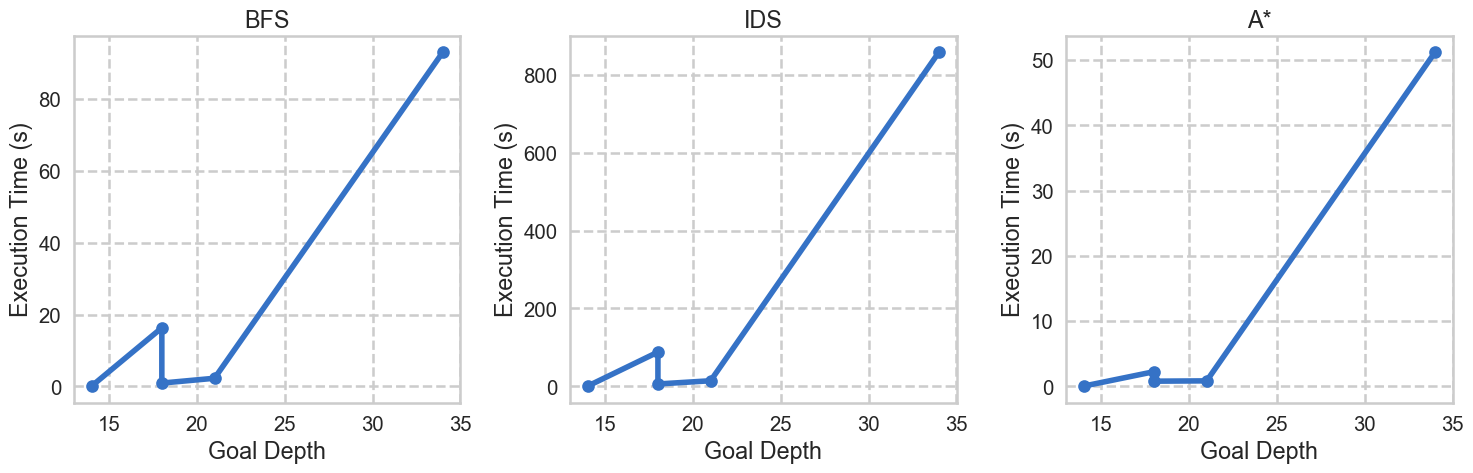

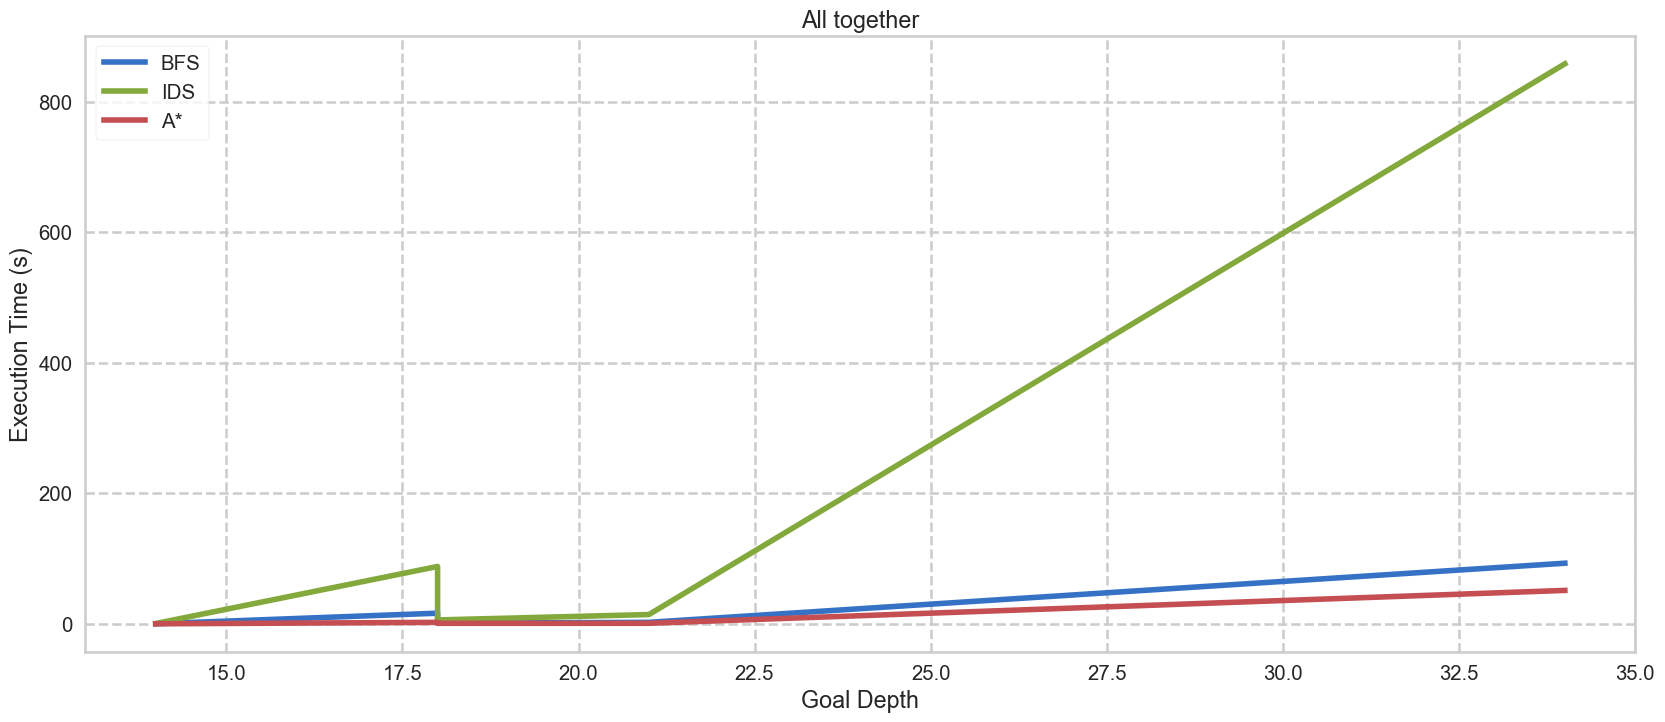

In [16]:
import matplotlib.pyplot as plt

# import jtplot module in notebook
from jupyterthemes import jtplot
jtplot.style(context='talk', fscale=1.4, spines=True, gridlines='--')
# jtplot.reset()

# 5 - 4 - 2 - 3 - 1
depths = [14, 18, 18, 21, 34]
BFS_times = [0.106, 16.311, 0.944, 2.286, 92.904]
IDS_times = [0.477, 87.921, 5.961, 14.221, 858.272]
A_times = [0.038, 2.245, 0.789, 0.840, 51.218]
line_width = 4

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(depths, BFS_times, s=10)
plt.plot(depths, BFS_times, '-o', linewidth=line_width)
plt.title("BFS")
plt.xlabel("Goal Depth")
plt.ylabel("Execution Time (s)")

plt.subplot(1, 3, 2)
plt.scatter(depths, IDS_times, s=10)
plt.plot(depths, IDS_times, '-o', linewidth=line_width)
plt.title("IDS")
plt.xlabel("Goal Depth")
plt.ylabel("Execution Time (s)")

plt.subplot(1, 3, 3)
plt.scatter(depths, A_times, s=10)
plt.plot(depths, A_times, '-o', linewidth=line_width)
plt.title("A*")
plt.xlabel("Goal Depth")
plt.ylabel("Execution Time (s)")

plt.tight_layout()        
plt.show()

plt.figure(figsize=(20, 8))
plt.plot(depths, BFS_times, label="BFS", linewidth=line_width)
plt.plot(depths, IDS_times, label="IDS", linewidth=line_width)
plt.plot(depths, A_times, label="A*", linewidth=line_width)
plt.title("All together")
plt.xlabel("Goal Depth")
plt.ylabel("Execution Time (s)")
plt.legend(loc="upper left")
plt.show()